**Task 1: SIFT Keypoints**

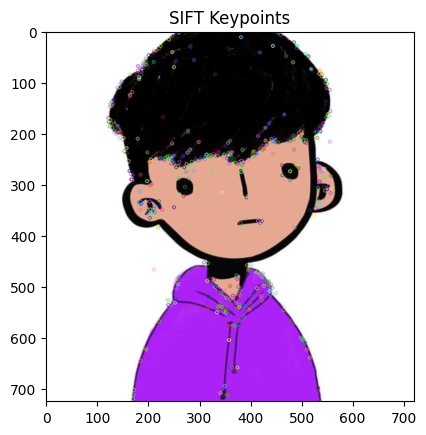

In [1]:
import cv2
import matplotlib.pyplot as plt

#Load the image
image = cv2.imread('sample.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#Initialize SIFT detector
sift = cv2.SIFT_create()

#Detect keypoints
keypoints, descriptors = sift.detectAndCompute(gray_image, None)

#Draw keypoints on the image
imagage_with_keypoints = cv2.drawKeypoints(image, keypoints, None)

#Display the image with keypoints
plt.imshow(cv2.cvtColor(imagage_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('SIFT Keypoints')
plt.show()

**Task 3: SURF Keypoints**

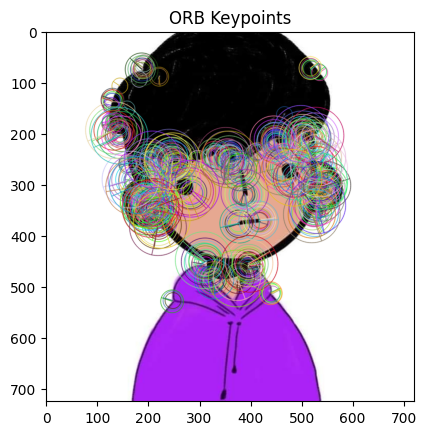

In [11]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("sample.jpg")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Initialize ORB detector
orb = cv2.ORB_create()

# Detect keypoints and descriptors
keypoints, descriptors = orb.detectAndCompute(gray_image, None)

# Draw keypoints on the image
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)

# Display the image with keypoints
image_with_keypoints = cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB)
plt.imshow(image_with_keypoints)
plt.title("ORB Keypoints")
plt.show()

**Task 4: Feature Matching**

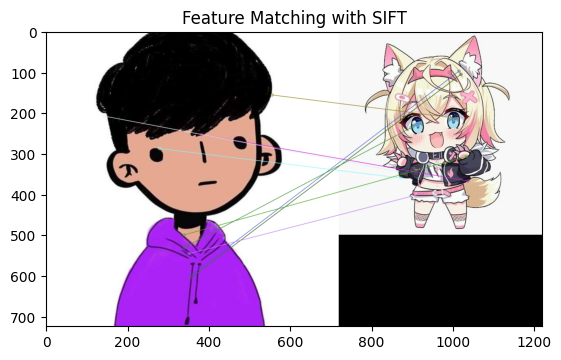

In [12]:
# Load the images
image1 = cv2.imread('sample.jpg')
image2 = cv2.imread('sample2.jpg')

#Initialize SIFT detector
sift = cv2.SIFT_create()

#Detect keypoints and descriptors
keypoints1, descriptors1 = sift.detectAndCompute(image1, None)
keypoints2, descriptors2 = sift.detectAndCompute(image2, None)

#Initialize the matcher
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

#Match descriptors
matches = bf.match(descriptors1, descriptors2)

#Sort matches by distance
matches = sorted(matches, key=lambda x: x.distance)

#Draw the first 10 matches
image_matches = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

#Display the image with matches
plt.imshow(cv2.cvtColor(image_matches, cv2.COLOR_BGR2RGB))
plt.title('Feature Matching with SIFT')
plt.show()

**Real-World Applications (Image Stitching using Homography)**

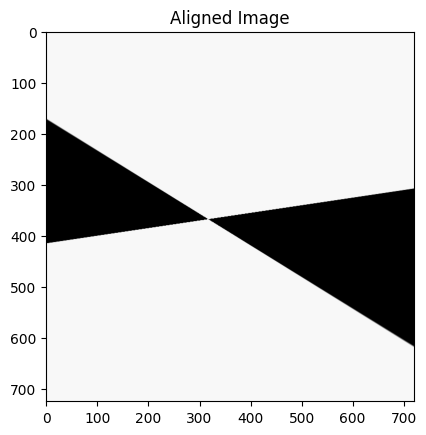

In [15]:
import numpy as np

image1 = cv2.imread('sample.jpg')
image2 = cv2.imread('sample2.jpg')

#Convert to grayscale
gray_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

#detect keypoints and descriptors using SIFT
sift = cv2.SIFT_create()
keypoints1, descriptors1 = sift.detectAndCompute(gray_image1, None)
keypoints2, descriptors2 = sift.detectAndCompute(gray_image2, None)

#Match features using BFMatcher
bf = cv2.BFMatcher()
matches = bf.knnMatch(descriptors1, descriptors2, k=2)

#Apply ratio test
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

#extract location of good matches
src_pts = np.float32([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

#compute homography matrix
M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

#Warp one image to aligh with the other
h, w = image1.shape[:2]
aligned_image = cv2.warpPerspective(image2, M, (w, h))

#Display the aligned images
plt.imshow(cv2.cvtColor(aligned_image, cv2.COLOR_BGR2RGB))
plt.title('Aligned Image')
plt.show()

**Task 6: Combining Feature Extraction Methods (10 points)**

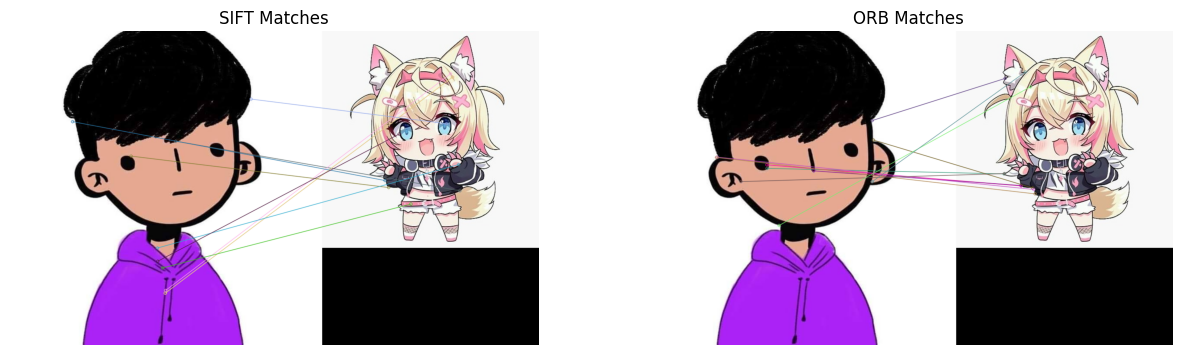

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load two images
image1 = cv2.imread('sample.jpg')  # Replace with your first image path
image2 = cv2.imread('sample2.jpg')  # Replace with your second image path

# Check if images are loaded correctly
if image1 is None or image2 is None:
    print("Error: One or both images not found.")
else:
    # SIFT detector
    sift = cv2.SIFT_create()
    keypoints1, descriptors1 = sift.detectAndCompute(image1, None)
    keypoints2, descriptors2 = sift.detectAndCompute(image2, None)

    # ORB detector
    orb = cv2.ORB_create()
    keypoints1_orb, descriptors1_orb = orb.detectAndCompute(image1, None)
    keypoints2_orb, descriptors2_orb = orb.detectAndCompute(image2, None)

    # Match keypoints from SIFT and ORB using a BFMatcher
    bf_sift = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
    matches_sift = bf_sift.match(descriptors1, descriptors2)

    bf_orb = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches_orb = bf_orb.match(descriptors1_orb, descriptors2_orb)

    # Sort matches by distance
    matches_sift = sorted(matches_sift, key=lambda x: x.distance)
    matches_orb = sorted(matches_orb, key=lambda x: x.distance)

    # Draw the matches for SIFT
    image_matches_sift = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches_sift[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    # Draw the matches for ORB
    image_matches_orb = cv2.drawMatches(image1, keypoints1_orb, image2, keypoints2_orb, matches_orb[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    # Display the results
    plt.figure(figsize=(15, 10))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image_matches_sift, cv2.COLOR_BGR2RGB))
    plt.title('SIFT Matches')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(image_matches_orb, cv2.COLOR_BGR2RGB))
    plt.title('ORB Matches')
    plt.axis('off')

    plt.show()
